In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

Gráfica Ventas vs. Semana (100% de los datos)

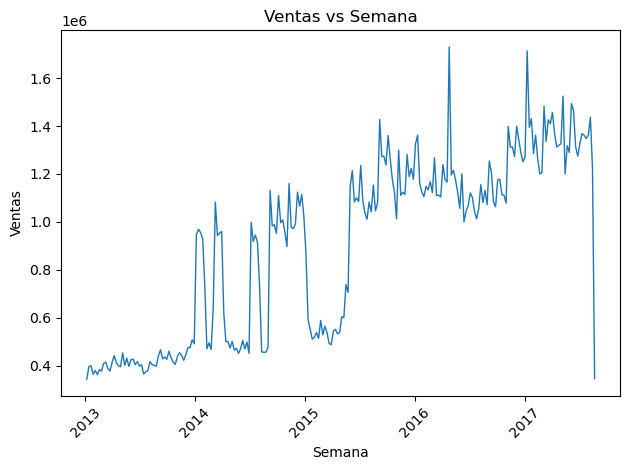

In [28]:
def graficar_puntos(entrada):
    # Intento de lectura del archivo CSV
    try:
        df = pd.read_csv(entrada)
    except FileNotFoundError:  # Archivo no encontrado
        print("Archivo no encontrado:", entrada)  # Mensaje de error
        return None
    except Exception as e:  # Captura de otro tipo de errores
        print("Error al leer el CSV:", e)  # Mensaje de error
        return None
    
    # Asegurar que la columna de fechas sea tipo datetime
    df["week_end"] = pd.to_datetime(df["week_end"])
    
    # Crear la gráfica
    plt.figure()
    plt.plot(df["week_end"], df["sales_week"], linewidth=1)
    
    # Títulos y etiquetas
    plt.title("Ventas vs Semana")
    plt.xlabel("Semana")
    plt.ylabel("Ventas")
    
    # Mejorar visualización de fechas
    plt.xticks(rotation=45)
    
    # Mostrar gráfica
    plt.tight_layout()
    plt.show()

graficar_puntos("datasetFinal.csv")

Estadísticas Básicas

In [29]:
def estadisticas_basicas(entrada):
    # Intento de lectura del archivo CSV
    try:
        df = pd.read_csv(entrada)
    except FileNotFoundError:  # Archivo no encontrado
        print("Archivo no encontrado:", entrada)  # Mensaje de error
        return None
    except Exception as e:  # Captura de otro tipo de errores
        print("Error al leer el CSV:", e)  # Mensaje de error
        return None
    
    # Seleccionar la columna de ventas
    ventas = df["sales_week"]
    
    # Cálculos estadísticos
    media = ventas.mean()
    mediana = ventas.median()
    desviacion_std = ventas.std()
    maximo = ventas.max()
    minimo = ventas.min()
    
    # Mostrar resultados
    print(f"Media: {media:.6f}")
    print(f"Mediana: {mediana:.6f}")
    print(f"Desviación estándar: {desviacion_std:.6f}")
    print(f"Máximo: {maximo:.6f}")
    print(f"Mínimo: {minimo:.6f}")
estadisticas_basicas("datasetFinal.csv")

Media: 896506.140496
Mediana: 1012483.000000
Desviación estándar: 373826.422417
Máximo: 1730603.000000
Mínimo: 343176.000000


In [30]:
def separar_datos(entrada):
    # Intento de lectura del archivo CSV
    try:
        df = pd.read_csv(entrada)
    except FileNotFoundError:  # Archivo no encontrado
        print("Archivo no encontrado:", entrada)  # Mensaje de error
        return None
    except Exception as e:  # Captura de otro tipo de errores
        print("Error al leer el CSV:", e)  # Mensaje de error
        return None
        
    # Número total de registros
    n = len(df)
    
    # Índice de corte (80%)
    corte = int(0.8 * n)
    
    # Separar los conjuntos
    datos_ajuste = df.iloc[:corte]
    datos_validacion = df.iloc[corte:]
    
    # Guardar los nuevos CSV
    datos_ajuste.to_csv("datos_ajuste.csv", index=False)
    datos_validacion.to_csv("datos_validacion.csv", index=False)
    
    print(f"Total registros: {n}")
    print(f"Registros ajuste (80%): {len(datos_ajuste)}")
    print(f"Registros validación (20%): {len(datos_validacion)}")

separar_datos("datasetFinal.csv")

Total registros: 242
Registros ajuste (80%): 193
Registros validación (20%): 49


Gráfica Ventas vs. Semana (80% de los datos)


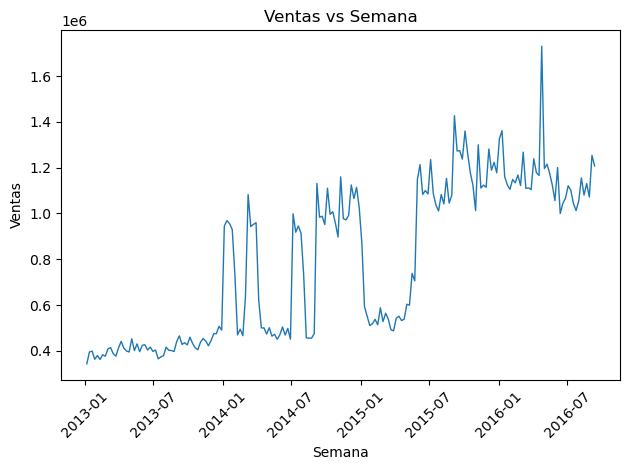

In [31]:
print("Gráfica Ventas vs. Semana (80% de los datos)")
graficar_puntos("datos_ajuste.csv")

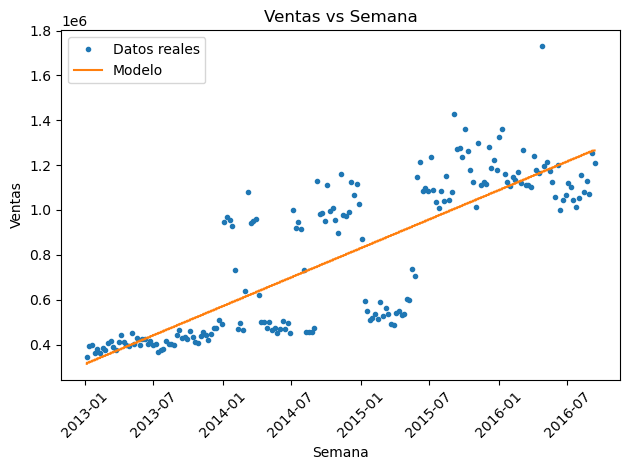

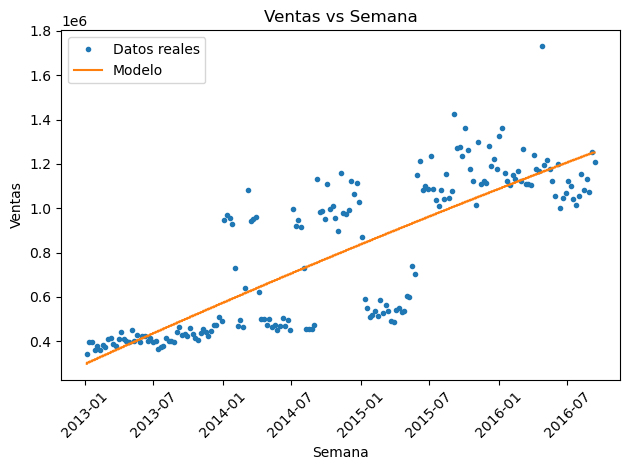

In [54]:
def f_1(x):
    return 4957.04751*x+313743.88309
def f_2(x):
    return -2.41086*x**2+5424.75467*x+298543.40035
def graficar_puntos_y_funcion(entrada, f):
    # Cargar datos
    df = pd.read_csv(entrada)
    df["week_end"] = pd.to_datetime(df["week_end"])

    # Eje x como índice temporal
    x = np.arange(len(df))
    y = df["sales_week"].values

    # Malla más fina para la función
    x_fino = np.linspace(x.min(), x.max(), 1000)
    y_fino = f(x_fino)

    # Gráfica
    plt.figure()
    plt.plot(df["week_end"], y, '.', label="Datos reales")
    plt.plot(df["week_end"].iloc[x_fino.astype(int)],
             y_fino, label="Modelo")

    plt.title("Ventas vs Semana")
    plt.xlabel("Semana")
    plt.ylabel("Ventas")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

graficar_puntos_y_funcion("datos_ajuste.csv", f_1)
graficar_puntos_y_funcion("datos_ajuste.csv", f_2)

